In [ ]:
# Use realtor data posted in class 5
# train a KNN model to predict "Airbnb Cash on Cash"


In [1]:
import pandas as pd

from sklearn.neighbors import KNeighborsRegressor # this is used when target is continuous
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

***Pre-Processing***  
  
  
Remove NA  
Select features and define target variable  
Normalize features  


In [7]:
realtor_df = pd.read_csv("5_realtor_data.csv")
realtor_df = realtor_df.dropna() #drop rows with missing values


# Display first 5 rows
realtor_df.head()

,Home Type,Zip,Listing Price,Baths,Beds,SQFT,Year Built,Airbnb Cash on Cash
0,Single Family Residential,61822,685000,5.0,3,2840.0,2010.0,0.834059
1,Single Family Residential,61822,349900,3.0,4,1926.0,2016.0,1.349840
2,Townhouse,61822,194900,3.0,3,1600.0,2017.0,8.629820
3,Single Family Residential,61820,126900,2.0,3,1330.0,1959.0,14.517200
4,Single Family Residential,61822,369900,4.0,4,2336.0,2006.0,1.116810


In [8]:
# Define features (independent variables)
X = realtor_df.iloc[:,2:6] # we do not use the first and second column "Home Type" and "Zip"

y = realtor_df.iloc[:,7]

In [9]:

# Fit and transform the feature variables
# X_scaled = (X-mean)/sd

X_scales = StandardScaler().fit_transform(X)
X_scales = pd.DataFrame(X_scales, columns=X.columns) # transform X_scaled back to a dataframe
print(X)
print(X_scales)

     Listing Price  Baths  Beds    SQFT
0           685000    5.0     3  2840.0
1           349900    3.0     4  1926.0
2           194900    3.0     3  1600.0
3           126900    2.0     3  1330.0
4           369900    4.0     4  2336.0
..             ...    ...   ...     ...
291         186900    0.0     3  1825.0
292         154900    0.0     3  1685.0
293         219900    0.0     4  2164.0
294         179000    0.0     3  1697.0
295         115000    0.0     3  1355.0

[271 rows x 4 columns]
     Listing Price     Baths      Beds      SQFT
0         3.062315  2.075858 -0.272854  0.791806
1         0.806620  0.691953  1.149135 -0.114693
2        -0.236749  0.691953 -0.272854 -0.438018
3        -0.694485  0.000000 -0.272854 -0.705802
4         0.941248  1.383905  1.149135  0.291942
..             ...       ...       ...       ...
266      -0.290600 -1.383905 -0.272854 -0.214864
267      -0.506005 -1.383905 -0.272854 -0.353715
268      -0.068464 -1.383905  1.149135  0.121354
269   

***Create Training and Testing Sets***

In [10]:
split_data=train_test_split(X_scales, y, test_size=0.2, random_state=42) # we will train the model with 80% of the data and test with 20%
# random_state is used to set the seed for random number generator, so that we can reproduce the same results
# train_test_split returns a tuple of 4 elements: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data

***Train the Model***


In [11]:
knn = KNeighborsRegressor(n_neighbors=7) #This creates the model but does not train it yet.

knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

***Make Predictions***

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions
y_pred = knn.predict(X_test)



In [13]:
print(y_pred)

[11.59833     0.48370349  5.86420429 14.46174286 10.18179     2.94773714
  5.20712829  1.40520714  3.90775143 16.25692857 12.4         9.77397429
 11.93196143 14.73591429  4.13637286 17.50402857  3.16024857  3.49441714
  2.75964286  7.98531857 17.08327143 11.21828286 14.08902857  5.20712829
  9.25902     0.42362157 13.6621      6.08039714 14.49662857 10.46293
  3.67253143  2.79883143 11.84882857 17.08327143  4.35740714  0.76174971
  1.68981571  0.95231343  3.87801    11.08672571  0.60371257 11.64170143
  4.65456429  8.25966429  1.68981571  9.77397429  2.74161571  9.50851143
  5.44682571  0.85814914  0.20133206  3.11958714  2.90843357  1.63880043
  7.66903857]


***Evaluate Model Performance***

In [ ]:
# Compute errors
#Print out is %
print( mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

1.4010723488055825
0.7507209064935063


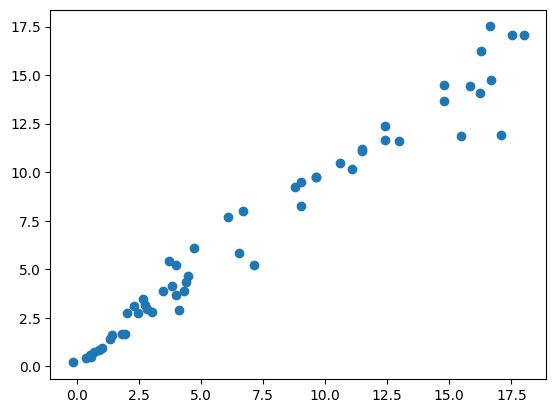

In [15]:
plt.scatter(y_test, y_pred)